In [1]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import scipy.stats as sct

In [2]:
names1 = ['apo', 'bound', 'allo-apo', 'allo-bound', 'allo-both']
names2 = ['g2489a', 'g249v', 'g249w', 'og249w']

In [3]:
xmin, xmax = 2.4, 3.4
ymin, ymax = 3.1, 4.1

In [4]:
bin1 = np.arange(2,4,0.01)
xb1 = bin1[1:] - (bin1[1]-bin1[0])/2

In [5]:
bin2 = np.arange(3,4.6,0.01)
xb2 = bin2[1:] - (bin2[1]-bin2[0])/2

In [6]:
def get_hist(d1, d2, b1, b2):
    h = np.histogram2d(d1, d2, bins=[b1,b2], density=False)[0].T/d1.shape[0]
    h[np.where(h==0)] = -np.inf
    return h

In [7]:
def get_linear(x,y,xv):
    lr = sct.linregress(x,y)
    return xv*lr[0]+lr[1]

In [8]:
def get_colors(d1, d2, b1, b2, cmap='jet'):
    h = np.histogram2d(d1, d2, bins=[b1,b2], density=False)[0]
    h = h/h.max()
    b1 = np.digitize(d1, b1) - 2
    b2 = np.digitize(d2, b2) - 2
    return h[b1,b2]

In [20]:
wt_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_4jx1_{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in names1]

In [21]:
wt_h = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_4jx1_{n}.xvg',
                  comments=['@','#'])[:,1]
       for n in names1]

In [22]:
hwt = [
    get_hist(wt_i[a], wt_h[a], bin1, bin2)
for a,_ in enumerate(wt_i)]

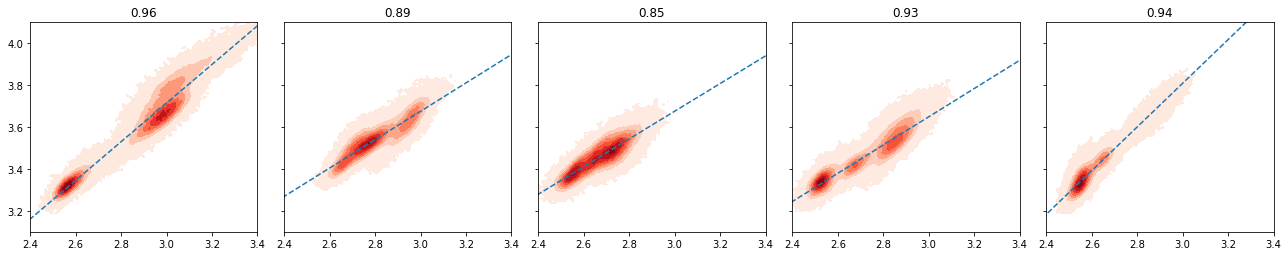

In [23]:
fig,ax=plt.subplots(1,len(hwt), figsize=(18/5*len(hwt),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hwt):
    ax[a].contourf(xb1, xb2, h, cmap='Reds')
    ax[a].plot(xb1, get_linear(wt_i[a], wt_h[a], xb1), '--')
    ax[a].set_title(np.round(np.corrcoef(wt_i[a], wt_h[a])[0][1],2))
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

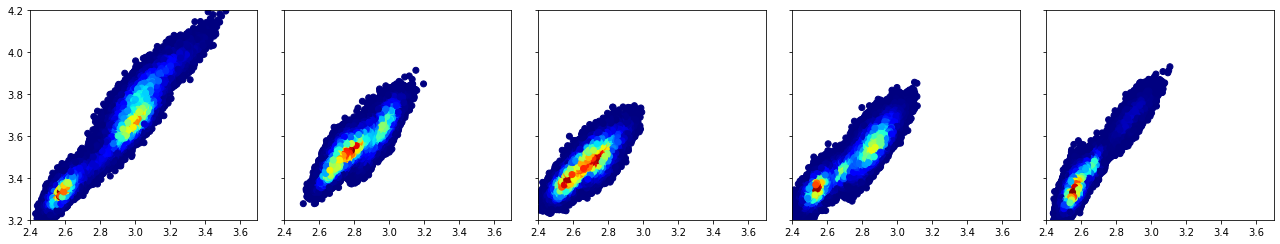

In [26]:
fig,ax=plt.subplots(1,len(hwt), figsize=(18/5*len(hwt),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hwt):
    ax[a].scatter(wt_i[a], wt_h[a], c=get_colors(wt_i[a], wt_h[a], bin1, bin2), cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

In [24]:
closed_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_{n}_apo.xvg',
                    comments=['@','#'])[:,1]
         for n in names2]

In [25]:
closed_h = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_{n}_apo.xvg',
                      comments=['@','#'])[:,1]
           for n in names2]

In [26]:
hclosed = [
    get_hist(closed_i[a], closed_h[a], bin1, bin2)
for a,_ in enumerate(closed_i)]

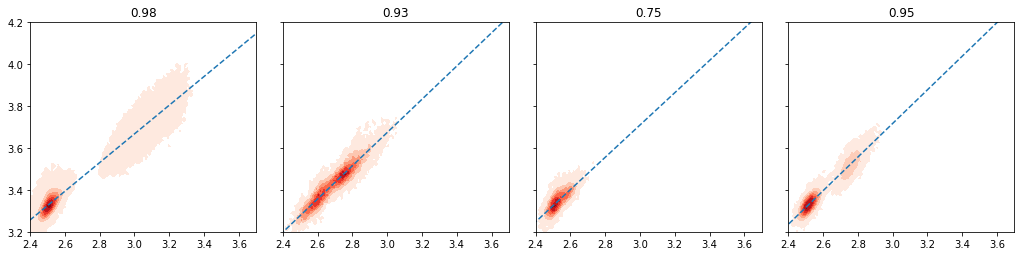

In [31]:
fig,ax=plt.subplots(1,len(hclosed), figsize=(18/5*len(hclosed),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hclosed):
    ax[a].contourf(xb1, xb2, h, cmap='Reds')
    ax[a].plot(xb1, get_linear(closed_i[a], closed_h[a], xb1), '--')
    ax[a].set_title(np.round(np.corrcoef(closed_i[a], closed_h[a])[0][1],2))
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

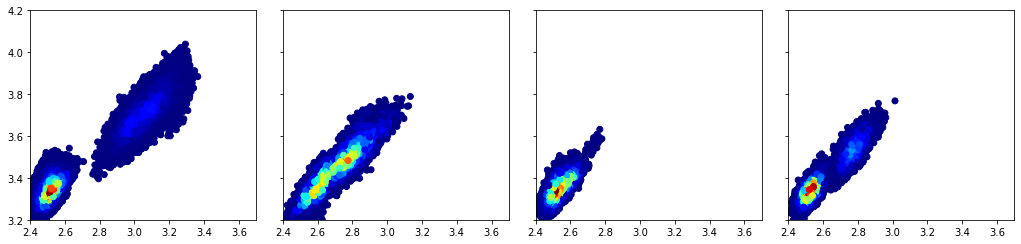

In [32]:
fig,ax=plt.subplots(1,len(hclosed), figsize=(18/5*len(hclosed),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hclosed):
    ax[a].scatter(closed_i[a], closed_h[a], c=get_colors(closed_i[a], closed_h[a], bin1, bin2), cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

In [27]:
opened_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_l166a_{n}.xvg',
                    comments=['@','#'])[:,1]
         for n in names1[:2]]

In [28]:
opened_h = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_l166a_{n}.xvg',
                      comments=['@','#'])[:,1]
           for n in names1[:2]]

In [29]:
hopened = [
    get_hist(opened_i[a], opened_h[a], bin1, bin2)
for a,_ in enumerate(opened_i)]

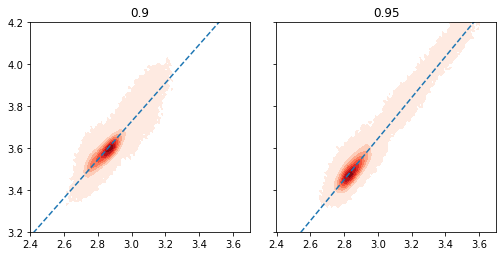

In [36]:
fig,ax=plt.subplots(1,len(hopened), figsize=(18/5*len(hopened),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hopened):
    ax[a].contourf(xb1, xb2, h, cmap='Reds')
    ax[a].plot(xb1, get_linear(opened_i[a], opened_h[a], xb1), '--')
    ax[a].set_title(np.round(np.corrcoef(opened_i[a], opened_h[a])[0][1],2))
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

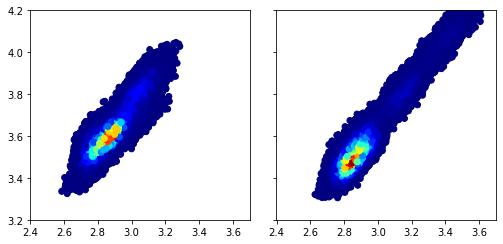

In [37]:
fig,ax=plt.subplots(1,len(hopened), figsize=(18/5*len(hopened),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hopened):
    ax[a].scatter(opened_i[a], opened_h[a], c=get_colors(opened_i[a], opened_h[a], bin1, bin2), cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

In [30]:
decoupled_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450_f163a_{n}.xvg',
                    comments=['@','#'])[:,1]
            for n in names1]

In [31]:
decoupled_h = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450_f163a_{n}.xvg',
                         comments=['@','#'])[:,1]
              for n in names1]

In [32]:
hdecoupled = [
    get_hist(decoupled_i[a], decoupled_h[a], bin1, bin2)
for a,_ in enumerate(decoupled_i)]

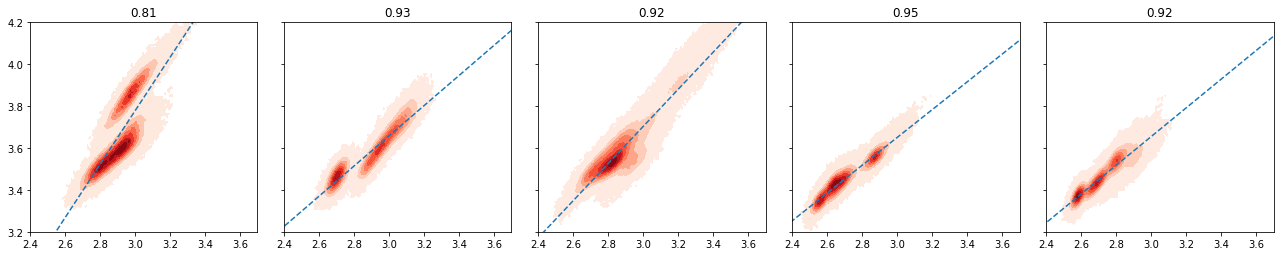

In [41]:
fig,ax=plt.subplots(1,len(hdecoupled), figsize=(18/5*len(hdecoupled),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hdecoupled):
    ax[a].contourf(xb1, xb2, h, cmap='Reds')
    ax[a].plot(xb1, get_linear(decoupled_i[a], decoupled_h[a], xb1), '--')
    ax[a].set_title(np.round(np.corrcoef(decoupled_i[a], decoupled_h[a])[0][1],2))
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

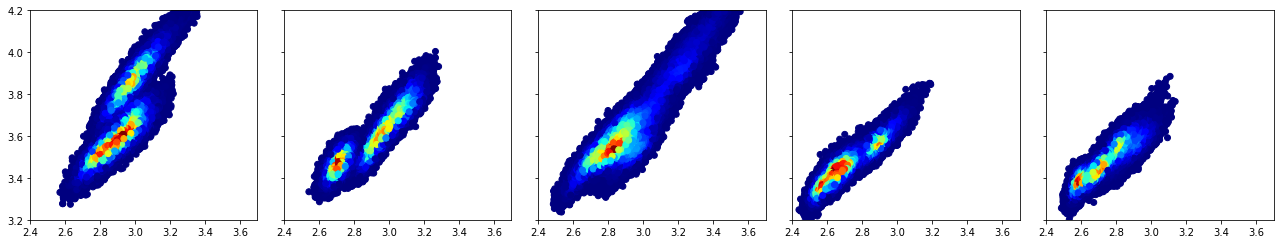

In [42]:
fig,ax=plt.subplots(1,len(hdecoupled), figsize=(18/5*len(hdecoupled),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hdecoupled):
    ax[a].scatter(decoupled_i[a], decoupled_h[a], c=get_colors(decoupled_i[a], decoupled_h[a], bin1, bin2), cmap='jet')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

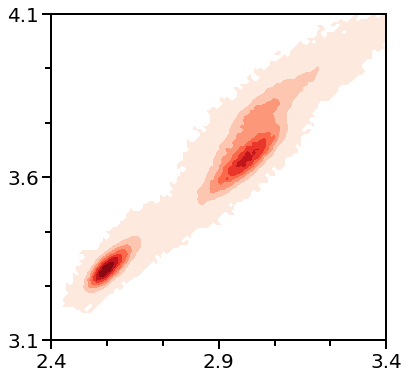

In [59]:
curve = hwt[0]
oname='wt_h_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2, curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin,ymax)
ax.set_yticks([3.1,3.6,4.1])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

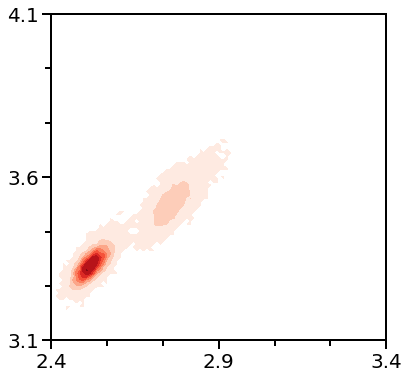

In [63]:
curve = hclosed[3]
oname='og249w_h_sf'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2, curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin,ymax)
ax.set_yticks([3.1,3.6,4.1])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

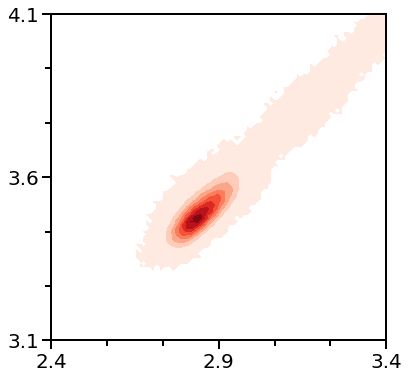

In [65]:
curve = hopened[1]
oname='l166a_h_cata'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2, curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin,ymax)
ax.set_yticks([3.1,3.6,4.1])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

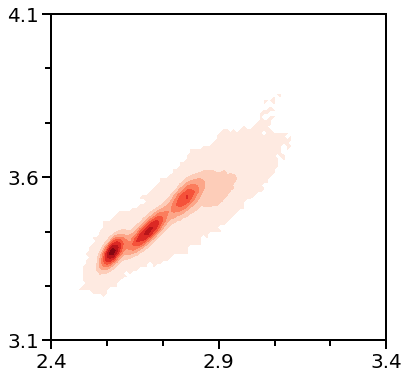

In [71]:
curve = hdecoupled[4]
oname='f163a_h_3s'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2, curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin,ymax)
ax.set_yticks([3.1,3.6,4.1])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_corr/{oname}.pdf', transparent=True)
plt.show()

### previous data

### pdx

In [9]:
pdx_i = [np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_p450-pdx_{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in names1]

In [10]:
pdx_h = [np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_p450-pdx_4jx1_{n}.xvg',
                  comments=['@','#'])[:,1]
       for n in names1]

In [11]:
hpdx = [
    get_hist(pdx_i[a], pdx_h[a], bin1, bin2)
for a,_ in enumerate(pdx_i)]

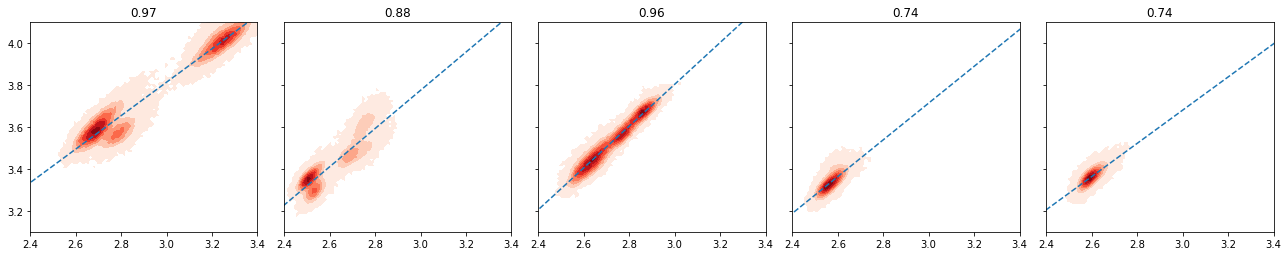

In [13]:
fig,ax=plt.subplots(1,len(hpdx), figsize=(18/5*len(hpdx),3.5), sharex=True, sharey=True)
plt.tight_layout()
for a,h in enumerate(hpdx):
    ax[a].contourf(xb1, xb2, h, cmap='Reds')
    ax[a].plot(xb1, get_linear(pdx_i[a], pdx_h[a], xb1), '--')
    ax[a].set_title(np.round(np.corrcoef(pdx_i[a], pdx_h[a])[0][1],2))
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(ymin,ymax)
plt.show()

In [16]:
h,_ = np.histogram(pdx_i[0], bins=bin1)

(2.4, 3.4)

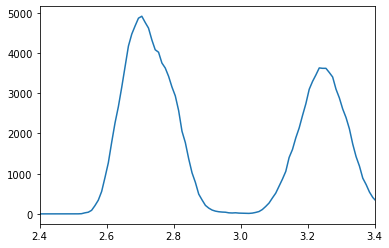

In [18]:
plt.plot(xb1, h)
plt.xlim(2.4,3.4)

### jacs-2018

In [12]:
nv_i = np.concatenate(([np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_navjeet{n}.xvg',
                comments=['@','#'])[:,1] 
     for n in [1,2,3]]))

In [13]:
nv_h = np.concatenate(([np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_navjeet{n}.xvg',
                  comments=['@','#'])[:,1]
       for n in [1,2,3]]))

In [14]:
hnv = get_hist(nv_i, nv_h, bin1, bin2)

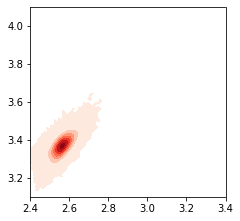

In [31]:
fig,ax=plt.subplots(1, figsize=(3.5,3.5))
ax.contourf(xb1, xb2, hnv, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
plt.show()

(2.4, 3.4)

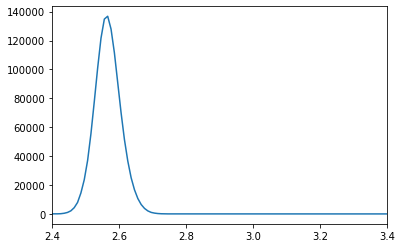

In [47]:
h,_ = np.histogram(nv_i, bins=bin1)
plt.plot(xb1, h)
plt.xlim(2.4,3.4)

### bpj-2021

In [15]:
bp_i = np.concatenate(([np.loadtxt(f'../7_ith_kink/1_ith_318beta_distance/pairdist_ith_318b_bhuppi_{n}.xvg',
                comments=['@','#'])[:,1][35001:] 
     for n in range(11,21)]))

In [16]:
bp_h = np.concatenate(([np.loadtxt(f'../7_ith_kink/3_ith_and_e_h_movements/2_h_318b/dist_318b_h_bhuppi_{n}.xvg',
                  comments=['@','#'])[:,1][35001:]
       for n in range(11,21)]))

In [17]:
hbp = get_hist(bp_i, bp_h, bin1, bin2)

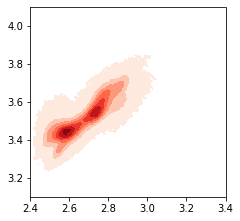

In [62]:
fig,ax=plt.subplots(1, figsize=(3.5,3.5))
ax.contourf(xb1, xb2, hbp, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
plt.show()

(2.4, 3.4)

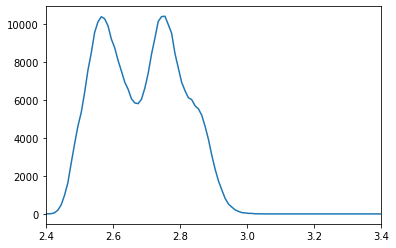

In [64]:
h,_ = np.histogram(bp_i, bins=bin1)
plt.plot(xb1, h)
plt.xlim(2.4,3.4)

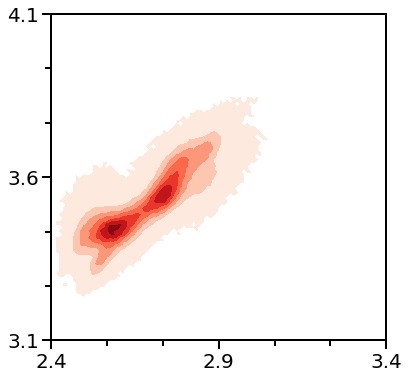

In [24]:
curve = hbp
oname='bpj_h'
fig,ax=plt.subplots(1, figsize=(6,6))
ax.contourf(xb1, xb2, curve, cmap='Reds')
ax.set_xlim(xmin,xmax)
ax.set_xticks([2.4,2.9,3.4])
ax.set_ylim(ymin,ymax)
ax.set_yticks([3.1,3.6,4.1])
ax.spines[:].set_linewidth(2)
ax.tick_params(length=9, width=2, labelsize=20)
ax.axes.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.axes.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='minor', length=6, width=2)
#
plt.savefig(f'saved_prev/{oname}.pdf', transparent=True)
plt.show()